# Deep Learning - MVA: Mini Project 1
## Dimitri Bouche (dimitri.bouche@ensae.fr)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# Keras imports
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, UpSampling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import sklearn

# Local import
import mp1
importlib.reload(mp1)

<module 'mp1' from '/home/dimitribouche/Bureau/MVA/S1/DL/TP1/mp1.py'>

# 2. Simple classification
## Generate the dataset and vizualize and few data points

In [3]:
# Generate train set
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

#G et dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


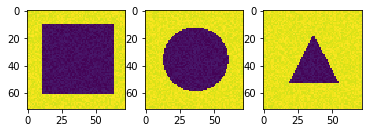

In [62]:
# Plot a data point for each class
rect = X_train[np.argwhere(Y_train == 0)[0], :].reshape((d_sqrt, d_sqrt))
circ = X_train[np.argwhere(Y_train == 1)[0], :].reshape((d_sqrt, d_sqrt))
tria = X_train[np.argwhere(Y_train == 2)[0], :].reshape((d_sqrt, d_sqrt))
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Linear probabilities model with softmax activation for classification

### Model architecture

In [4]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

### Model training

In [5]:
# Stochastic gradient descent optimizer
# sgd = SGD(lr=0.01,
#           decay=1e-6,
#           momentum=0.9,
#           nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


# Fit the model with SGD optimizer
epochs = 1000
batch_size = 32
history = model.fit(X_train, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/1000
300/300 [==============================] - 1s 2ms/step - loss: 2.0065 - acc: 0.4600
Epoch 2/1000
300/300 [==============================] - 0s 100us/step - loss: 1.0376 - acc: 0.6133
Epoch 3/1000
300/300 [==============================] - 0s 145us/step - loss: 0.5343 - acc: 0.7900
Epoch 4/1000
300/300 [==============================] - 0s 143us/step - loss: 0.4255 - acc: 0.8300
Epoch 5/1000
300/300 [==============================] - 0s 115us/step - loss: 0.3933 - acc: 0.8400
Epoch 6/1000
300/300 [==============================] - 0s 134us/step - loss: 0.2939 - acc: 0.9400
Epoch 7/1000
300/300 [==============================] - 0s 125us/step - loss: 0.2524 - acc: 0.9433
Epoch 8/1000
300/300 [==============================] - 0s 129us/step - loss: 0.2182 - acc: 0.9700
Epoch 9/1000
300/300 [==============================] - 0s 129us/step - loss: 0.2096 - acc: 0.9567
Epoch 10/1000
300/300 [==============================] - 0s 129us/step - loss: 0.1857 - acc: 0.9767
Epoch 11/10

300/300 [==============================] - 0s 87us/step - loss: 0.0032 - acc: 1.0000
Epoch 165/1000
300/300 [==============================] - 0s 94us/step - loss: 0.0030 - acc: 1.0000
Epoch 166/1000
300/300 [==============================] - 0s 75us/step - loss: 0.0030 - acc: 1.0000
Epoch 167/1000
300/300 [==============================] - 0s 82us/step - loss: 0.0030 - acc: 1.0000
Epoch 168/1000
300/300 [==============================] - 0s 92us/step - loss: 0.0030 - acc: 1.0000
Epoch 169/1000
300/300 [==============================] - 0s 82us/step - loss: 0.0029 - acc: 1.0000
Epoch 170/1000
300/300 [==============================] - 0s 81us/step - loss: 0.0029 - acc: 1.0000
Epoch 171/1000
300/300 [==============================] - 0s 82us/step - loss: 0.0028 - acc: 1.0000
Epoch 172/1000
300/300 [==============================] - 0s 92us/step - loss: 0.0028 - acc: 1.0000
Epoch 173/1000
300/300 [==============================] - 0s 104us/step - loss: 0.0028 - acc: 1.0000
Epoch 174/1000

Epoch 246/1000
300/300 [==============================] - 0s 86us/step - loss: 0.0014 - acc: 1.0000
Epoch 247/1000
300/300 [==============================] - 0s 82us/step - loss: 0.0014 - acc: 1.0000
Epoch 248/1000
300/300 [==============================] - 0s 81us/step - loss: 0.0014 - acc: 1.0000
Epoch 249/1000
300/300 [==============================] - 0s 78us/step - loss: 0.0014 - acc: 1.0000
Epoch 250/1000
300/300 [==============================] - 0s 91us/step - loss: 0.0014 - acc: 1.0000
Epoch 251/1000
300/300 [==============================] - 0s 84us/step - loss: 0.0014 - acc: 1.0000
Epoch 252/1000
300/300 [==============================] - 0s 86us/step - loss: 0.0014 - acc: 1.0000
Epoch 253/1000
300/300 [==============================] - 0s 84us/step - loss: 0.0014 - acc: 1.0000
Epoch 254/1000
300/300 [==============================] - 0s 86us/step - loss: 0.0013 - acc: 1.0000
Epoch 255/1000
300/300 [==============================] - 0s 85us/step - loss: 0.0013 - acc: 1.0000


300/300 [==============================] - 0s 89us/step - loss: 4.8067e-04 - acc: 1.0000
Epoch 405/1000
300/300 [==============================] - 0s 75us/step - loss: 4.7364e-04 - acc: 1.0000
Epoch 406/1000
300/300 [==============================] - 0s 72us/step - loss: 4.7342e-04 - acc: 1.0000
Epoch 407/1000
300/300 [==============================] - 0s 81us/step - loss: 4.6644e-04 - acc: 1.0000
Epoch 408/1000
300/300 [==============================] - 0s 80us/step - loss: 4.7223e-04 - acc: 1.0000
Epoch 409/1000
300/300 [==============================] - 0s 79us/step - loss: 4.6500e-04 - acc: 1.0000
Epoch 410/1000
300/300 [==============================] - 0s 84us/step - loss: 4.7903e-04 - acc: 1.0000
Epoch 411/1000
300/300 [==============================] - 0s 80us/step - loss: 4.6706e-04 - acc: 1.0000
Epoch 412/1000
300/300 [==============================] - 0s 87us/step - loss: 4.5537e-04 - acc: 1.0000
Epoch 413/1000
300/300 [==============================] - 0s 81us/step - loss: 

300/300 [==============================] - 0s 84us/step - loss: 1.9666e-04 - acc: 1.0000
Epoch 561/1000
300/300 [==============================] - 0s 95us/step - loss: 1.9383e-04 - acc: 1.0000
Epoch 562/1000
300/300 [==============================] - 0s 107us/step - loss: 1.9394e-04 - acc: 1.0000
Epoch 563/1000
300/300 [==============================] - 0s 113us/step - loss: 1.9592e-04 - acc: 1.0000
Epoch 564/1000
300/300 [==============================] - 0s 91us/step - loss: 1.9291e-04 - acc: 1.0000
Epoch 565/1000
300/300 [==============================] - 0s 111us/step - loss: 1.9360e-04 - acc: 1.0000
Epoch 566/1000
300/300 [==============================] - 0s 106us/step - loss: 1.8882e-04 - acc: 1.0000
Epoch 567/1000
300/300 [==============================] - 0s 107us/step - loss: 1.8755e-04 - acc: 1.0000
Epoch 568/1000
300/300 [==============================] - 0s 89us/step - loss: 1.8743e-04 - acc: 1.0000
Epoch 569/1000
300/300 [==============================] - 0s 75us/step - l

300/300 [==============================] - 0s 81us/step - loss: 8.5193e-05 - acc: 1.0000
Epoch 717/1000
300/300 [==============================] - 0s 79us/step - loss: 8.4916e-05 - acc: 1.0000
Epoch 718/1000
300/300 [==============================] - 0s 81us/step - loss: 8.4173e-05 - acc: 1.0000
Epoch 719/1000
300/300 [==============================] - 0s 88us/step - loss: 8.4869e-05 - acc: 1.0000
Epoch 720/1000
300/300 [==============================] - 0s 76us/step - loss: 8.3196e-05 - acc: 1.0000
Epoch 721/1000
300/300 [==============================] - 0s 78us/step - loss: 8.3654e-05 - acc: 1.0000
Epoch 722/1000
300/300 [==============================] - 0s 86us/step - loss: 8.2457e-05 - acc: 1.0000
Epoch 723/1000
300/300 [==============================] - 0s 87us/step - loss: 8.2205e-05 - acc: 1.0000
Epoch 724/1000
300/300 [==============================] - 0s 87us/step - loss: 8.1640e-05 - acc: 1.0000
Epoch 725/1000
300/300 [==============================] - 0s 92us/step - loss: 

300/300 [==============================] - 0s 101us/step - loss: 3.8079e-05 - acc: 1.0000
Epoch 873/1000
300/300 [==============================] - 0s 107us/step - loss: 3.8097e-05 - acc: 1.0000
Epoch 874/1000
300/300 [==============================] - 0s 85us/step - loss: 3.7790e-05 - acc: 1.0000
Epoch 875/1000
300/300 [==============================] - 0s 84us/step - loss: 3.7766e-05 - acc: 1.0000
Epoch 876/1000
300/300 [==============================] - 0s 92us/step - loss: 3.7620e-05 - acc: 1.0000
Epoch 877/1000
300/300 [==============================] - 0s 99us/step - loss: 3.7468e-05 - acc: 1.0000
Epoch 878/1000
300/300 [==============================] - 0s 108us/step - loss: 3.8707e-05 - acc: 1.0000
Epoch 879/1000
300/300 [==============================] - 0s 107us/step - loss: 3.7527e-05 - acc: 1.0000
Epoch 880/1000
300/300 [==============================] - 0s 90us/step - loss: 3.7265e-05 - acc: 1.0000
Epoch 881/1000
300/300 [==============================] - 0s 112us/step - l

In [6]:
# Test on one observation
X_test = mp1.generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict_proba(X_test)

array([[0., 1., 0.]], dtype=float32)

# 3. Vizualize

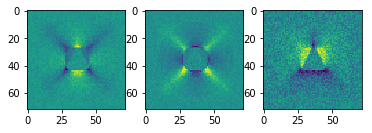

In [9]:
# Get weights matrix
w = model.get_weights()[0]
fig, ax = plt.subplots(ncols=3)
for i in range(0, 3):
    ax[i].imshow(w[:, i].reshape((d_sqrt, d_sqrt)))

# 4. A more complex classification problem
## Load the dataset and vizualize a few points

In [2]:
def reshape_to_2D(flat_im):
    d = flat_im.shape[0]
    d_sqrt = int(np.sqrt(d))
    return flat_im.reshape((d_sqrt, d_sqrt))

In [85]:
# Generate the dataset
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20, True)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

# Get dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

# Put Xs back to 2D
X_train2D = np.array([x.reshape((d_sqrt, d_sqrt)) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(ntrain, d_sqrt, d_sqrt, 1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


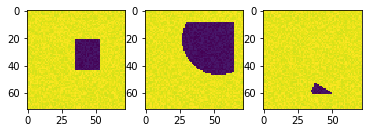

In [86]:
# Plot a data point for each class
rect = X_train2D[np.argwhere(Y_train == 0)[0][0], :, :, 0]
circ = X_train2D[np.argwhere(Y_train == 1)[0][0], :, :, 0]
tria = X_train2D[np.argwhere(Y_train == 2)[0][0], :, :, 0]
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Convolutionnal neural network
###  Architecture

In [92]:
# Create empty sequential model
model = Sequential()

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=16, kernel_size=5, input_shape=(d_sqrt, d_sqrt, 1)))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add flatten layer to go back to 1D
model.add(Flatten())

# Add output dense layer with softmax activation
model.add(Dense(units=3))
model.add(Activation("softmax"))

### Optimization

In [93]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


# Fit the model with adam optimizer
epochs = 40
batch_size = 32
history = model.fit(X_train2D, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/40
300/300 [==============================] - 1s 2ms/step - loss: 1.3345 - acc: 0.3867
Epoch 2/40
300/300 [==============================] - 1s 2ms/step - loss: 1.1036 - acc: 0.4400
Epoch 3/40
300/300 [==============================] - 0s 1ms/step - loss: 0.9617 - acc: 0.6167
Epoch 4/40
300/300 [==============================] - 0s 1ms/step - loss: 0.8998 - acc: 0.5733
Epoch 5/40
300/300 [==============================] - 0s 2ms/step - loss: 0.8005 - acc: 0.7000
Epoch 6/40
300/300 [==============================] - 0s 2ms/step - loss: 0.7368 - acc: 0.7600
Epoch 7/40
300/300 [==============================] - 0s 2ms/step - loss: 0.6875 - acc: 0.7267
Epoch 8/40
300/300 [==============================] - 0s 1ms/step - loss: 0.6391 - acc: 0.7600
Epoch 9/40
300/300 [==============================] - 0s 1ms/step - loss: 0.5960 - acc: 0.7967
Epoch 10/40
300/300 [==============================] - 0s 2ms/step - loss: 0.5619 - acc: 0.8067
Epoch 11/40
300/300 [============================

# 5. A regression problem

In [2]:
# Load the dataset
[X_train, Y_train] = mp1.generate_dataset_regression(300, 20)

[X_test, Y_test] = mp1.generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [5]:
# Get dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

# Put Xs back to 2D
X_train2D = np.array([x.reshape((d_sqrt, d_sqrt)) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(ntrain, d_sqrt, d_sqrt, 1)

X_test2D = np.array([x.reshape((d_sqrt, d_sqrt)) for x in X_test])
X_test2D = X_test2D.reshape(ntrain, d_sqrt, d_sqrt, 1)

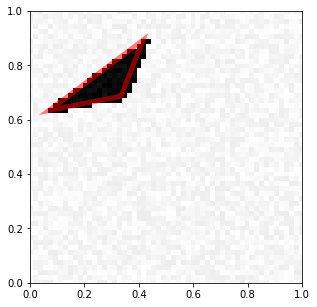

In [7]:
mp1.visualize_prediction(X_train[0], Y_train[0])

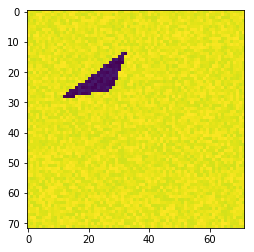

In [33]:
plt.imshow(X_train2D[0, :, :, 0])

In [36]:
d_sqrt

72

In [8]:
Y_norm = (Y_train - np.mean(Y_train, axis=0)) / np.var(Y_train, axis=0)

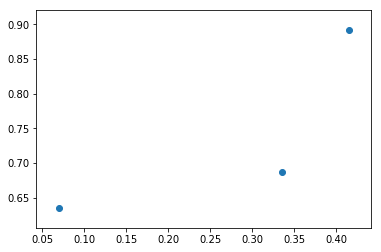

In [57]:
plt.scatter(Y_train[0][[0, 2, 4]], Y_train[0][[1, 3, 5]])

In [42]:
model = Sequential()

model.add(Dense(units=100, input_shape=(d, )))
model.add(Activation("relu"))

model.add(Dense(units=100, input_shape=model.layers[0].output_shape))
model.add(Activation("relu"))

model.add(Dense(units=100, input_shape=model.layers[1].output_shape))
model.add(Activation("relu"))

model.add(Dense(units=6))

In [44]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=adam)


# Fit the model with adam optimizer
epochs = 300
batch_size = 32
history = model.fit(X_train, Y_norm, epochs=epochs, batch_size=batch_size)

Epoch 1/300
300/300 [==============================] - 0s 1ms/step - loss: 10.6371
Epoch 2/300
300/300 [==============================] - 0s 445us/step - loss: 8.8807
Epoch 3/300
300/300 [==============================] - 0s 458us/step - loss: 8.2514
Epoch 4/300
300/300 [==============================] - 0s 470us/step - loss: 7.7993
Epoch 5/300
300/300 [==============================] - 0s 463us/step - loss: 7.7179
Epoch 6/300
300/300 [==============================] - 0s 458us/step - loss: 7.4708
Epoch 7/300
300/300 [==============================] - 0s 460us/step - loss: 7.4847
Epoch 8/300
300/300 [==============================] - 0s 415us/step - loss: 7.1891
Epoch 9/300
300/300 [==============================] - 0s 441us/step - loss: 7.3321
Epoch 10/300
300/300 [==============================] - 0s 426us/step - loss: 7.1040
Epoch 11/300
300/300 [==============================] - 0s 469us/step - loss: 6.8524
Epoch 12/300
300/300 [==============================] - 0s 456us/step - los

300/300 [==============================] - 0s 434us/step - loss: 1.1101
Epoch 193/300
300/300 [==============================] - 0s 402us/step - loss: 1.2389
Epoch 194/300
300/300 [==============================] - 0s 440us/step - loss: 1.0163
Epoch 195/300
300/300 [==============================] - 0s 413us/step - loss: 1.0829
Epoch 196/300
300/300 [==============================] - 0s 398us/step - loss: 1.0476
Epoch 197/300
300/300 [==============================] - 0s 436us/step - loss: 0.9127
Epoch 198/300
300/300 [==============================] - 0s 444us/step - loss: 1.1401
Epoch 199/300
300/300 [==============================] - 0s 424us/step - loss: 1.0337
Epoch 200/300
300/300 [==============================] - 0s 374us/step - loss: 1.0047
Epoch 201/300
300/300 [==============================] - 0s 373us/step - loss: 0.8417
Epoch 202/300
300/300 [==============================] - 0s 427us/step - loss: 0.8787
Epoch 203/300
300/300 [==============================] - 0s 423us/st

In [52]:
Y_test = model.predict(X_test)

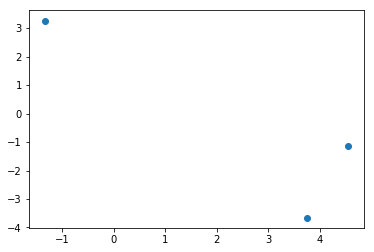

In [53]:
plt.scatter(Y_test[10][[0, 2, 4]], Y_test[10][[1, 3, 5]])

In [54]:
Y_test = Y_test * np.var(Y_train, axis=0) + np.mean(Y_train, axis=0)

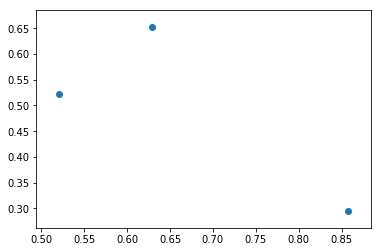

In [58]:
plt.scatter(Y_test[0][[0, 2, 4]], Y_test[0][[1, 3, 5]])

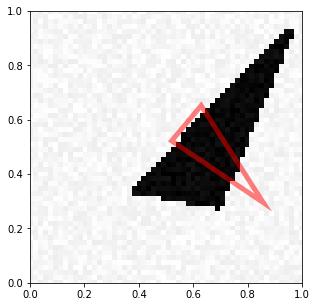

In [51]:
mp1.visualize_prediction(X_test[0], Y_test[0])

In [39]:
# Create empty sequential model
model = Sequential()

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=16, kernel_size=5, input_shape=(d_sqrt, d_sqrt, 1)))
model.add(Activation("relu"))

print(model.layers[0].output_shape)

# Add mean pooling layer with relu activation function
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Activation("relu"))

print(model.layers[1].output_shape)

# Add the first (and last) layer for linear classification
# u1 = 10
# model.add(Dense(units=u1, input_shape=(d, )))
# model.add(Activation("relu"))

# u2 = 50
# model.add(Dense(units=u2, input_shape=(u1, )))
# model.add(Activation("relu"))


# Add flatten layer to go back to 1D
model.add(Flatten())

model.add(Dense(units=20))
model.add(Activation("relu"))

# Add output dense layer with softmax activation
model.add(Dense(units=6))
# model.add(Activation("linear"))

(None, 68, 68, 16)
(None, 68, 68, 16)


In [26]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=adam)


# Fit the model with adam optimizer
epochs = 50
batch_size = 32
history = model.fit(X_train2D, Y_norm, epochs=epochs, batch_size=batch_size)
# history = model.fit(X_train, Y_norm, epochs=epochs, batch_size=batch_size)

Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 0.4900
Epoch 2/50
300/300 [==============================] - 1s 2ms/step - loss: 0.3094
Epoch 3/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2270
Epoch 4/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1906
Epoch 5/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1773
Epoch 6/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1674
Epoch 7/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1614
Epoch 8/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1589
Epoch 9/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1567
Epoch 10/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1567
Epoch 11/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1565
Epoch 12/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1558
Epoch 13/50
300/300 [====

In [27]:
Y_test = model.predict(X_test2D)

In [28]:
Y_test.shape

(300, 6)

In [29]:
Y_test = Y_test * np.var(Y_train, axis=0) + np.mean(Y_train, axis=0)

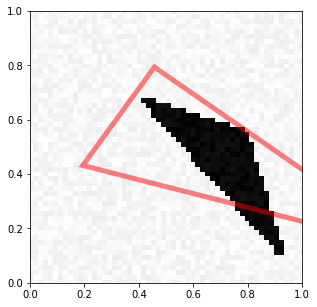

In [30]:
mp1.visualize_prediction(X_test[5], Y_test[5])

## Hourglass network for denoising

In [3]:
def generate_denoising_pair(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdatanoisy = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata, imdatanoisy

In [4]:
def generate_rectangle_pair(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_denoising_pair(figsize, U, V, noise)

In [5]:
def generate_disk_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_denoising_pair(figsize, U, V, noise)

In [6]:
def generate_triangle_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_denoising_pair(figsize, U, V, noise)

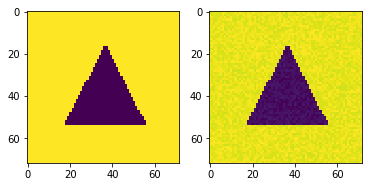

In [8]:
clean, noisy = generate_triangle_pair(noise = 20)
clean2D, noisy2D = reshape_to_2D(clean), reshape_to_2D(noisy)
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(clean2D)
axes[1].imshow(noisy2D)

In [47]:
def generate_denoising_dataset(nb_samples=300, noise=20, freelocation=False):
    im_size = generate_rectangle_pair()[0].shape[0]
    X_noisy = np.zeros((nb_samples, im_size))
    X_clean = np.zeros((nb_samples, im_size))
    for i in range(0, nb_samples):
        draw = np.random.randint(0, 3)
        if draw == 0:
            X_clean[i, :], X_noisy[i, :] = generate_rectangle_pair(noise, freelocation)
        elif draw == 1:
            X_clean[i, :], X_noisy[i, :]= generate_disk_pair(noise, freelocation)
        else:
            X_clean[i, :], X_noisy[i, :] = generate_triangle_pair(noise, freelocation)
    return X_clean, X_noisy

In [48]:
X_clean, X_noisy = generate_denoising_dataset(nb_samples=1000)

In [89]:
X_noisy2D = np.array([reshape_to_2D(x) for x in X_noisy])
X_clean2D = np.array([reshape_to_2D(x) for x in X_clean])
X_noisy2D = X_noisy2D.reshape(X_noisy2D.shape + (1, ))
X_clean2D = X_clean2D.reshape(X_clean2D.shape + (1, ))

In [90]:
X_noisy2D.shape

(1000, 72, 72, 1)

In [102]:
def build_autoencoder(input_shape):
    
    model = Sequential()
    
    # ENCODER
    # First convolutionnal layer
    model.add(Conv2D(filters=16, kernel_size=5, padding='same', input_shape=input_shape))
    model.add(Activation("relu"))
    # First Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Activation("relu"))
    # Second convolutionnal layer
    model.add(Conv2D(filters=32, kernel_size=5, padding='same'))
    model.add(Activation("relu"))
#     # Second maxpooling layer
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Activation("relu"))
#     print(model.layers[3].output_shape)
#     # Third convolutionnal layer
#     model.add(Conv2D(filters=64, kernel_size=5))
#     model.add(Activation("relu"))
    
    # DECODER
    # First convolutionnal layer
    model.add(Conv2D(filters=32, kernel_size=5, padding='same'))
    model.add(Activation("relu"))
    # First Upsampling layer
    model.add(UpSampling2D((2, 2)))
    model.add(Activation("relu"))
#     # Second convolutionnal layer
#     model.add(Conv2D(filters=16, kernel_size=5))
#     model.add(Activation("relu"))
#     # Second upsampling layer
#     model.add(UpSampling2D((2, 2)))
#     model.add(Activation("relu"))
#     # Decoding final layer
    model.add(Conv2D(filters=1, kernel_size=5, padding='same'))
    model.add(Activation("relu"))
    return model

In [103]:
input_shape = X_noisy2D[0, :, :, :].shape
print(input_shape)

(72, 72, 1)


In [104]:
autoencoder = build_autoencoder(input_shape)

In [105]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
autoencoder.compile(loss='mean_squared_error',
              optimizer=RMSprop())


# Fit the model with adam optimizer
epochs = 5
batch_size = 50
# history = autoencoder.fit(X_noisy2D, X_clean2D, epochs=epochs, batch_size=batch_size)
history = autoencoder.fit(X_noisy2D, X_clean2D, epochs=epochs, batch_size=batch_size)
# history = model.fit(X_train, Y_norm, epochs=epochs, batch_size=batch_size)

Epoch 1/5
1000/1000 [==============================] - 22s 22ms/step - loss: 57724.1720
Epoch 2/5
1000/1000 [==============================] - 27s 27ms/step - loss: 5318.4356
Epoch 3/5
1000/1000 [==============================] - 23s 23ms/step - loss: 4405.6917
Epoch 4/5
1000/1000 [==============================] - 26s 26ms/step - loss: 3183.2586
Epoch 5/5
1000/1000 [==============================] - 25s 25ms/step - loss: 2573.5528


In [95]:
X_pred = autoencoder.predict(X_noisy2D)

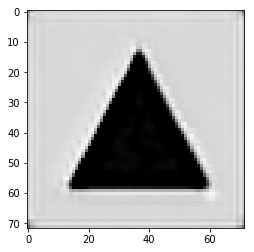

In [101]:
plt.imshow(X_pred[0, :, :, 0], cmap="gray")

In [100]:
X_pred[0, :, :, 0] *= 255/np.max(X_pred[0, :, :, 0])

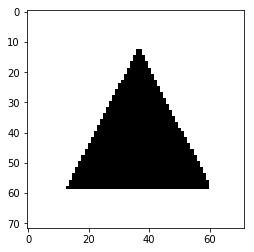

In [97]:
plt.imshow(X_clean2D[0, :, :, 0], cmap="gray")